In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

In [33]:
#이런 형식으로 작성하면 가독성이 높다. 
unames=['user_id','gender','age','occupation','zip']
rnames=['user_id','movie_id','ratings','timestamp']
mnames=['movie_id','title','geners']

upath="C:/Users/student/Downloads/dataset/movielens/users.dat"
rpath="C:/Users/student/Downloads/dataset/movielens/ratings.dat"
mpath="C:/Users/student/Downloads/dataset/movielens/movies.dat"

users=pd.read_csv(upath, sep="::",header=None, names=unames)

ratings=pd.read_csv(rpath, sep="::",header=None, names=rnames)

movies=pd.read_csv(mpath, sep="::",header=None, names=mnames)



C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='p

In [34]:
ratings


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [35]:
"""영화 ID, 평점

분류
1. 최소 3편 이상 같은 영화 본 사람
2. 평점 유사하게 부여한 사람(유클리디안 거리 공식-> 점과점사이 공식=> knn기반)

5편 영화 기준으로 
3편은 똑같은거 봤는데 나머지 2편에 대해 다른 영화를 봤을수도 있고 안봤을 수도 있는데
어떻게 처리할지 생각. 다른 사람이 봐서 준 평점을 나한테 추천해줄수도 있다.

서로 같은 평점 차의 각각의 제곱의 합에 루트.
추천시스템 만드는거.
나랑 산 제품 or 본 제품 비슷한걸 다른사람의 데이터로 나한테 추천해주는 시스템.
"""

'영화 ID, 평점\n\n분류\n1. 최소 3편 이상 같은 영화 본 사람\n2. 평점 유사하게 부여한 사람(유클리디안 거리 공식-> 점과점사이 공식=> knn기반)\n\n5편 영화 기준으로 \n3편은 똑같은거 봤는데 나머지 2편에 대해 다른 영화를 봤을수도 있고 안봤을 수도 있는데\n어떻게 처리할지 생각. 다른 사람이 봐서 준 평점을 나한테 추천해줄수도 있다.\n\n서로 같은 평점 차의 각각의 제곱의 합에 루트.\n추천시스템 만드는거.\n나랑 산 제품 or 본 제품 비슷한걸 다른사람의 데이터로 나한테 추천해주는 시스템.\n'

In [36]:
#우리 타이타닉, bike sharing, 미국 인구통계청 이름 데이터, 영화 평점(웹 크롤링),
#토지(고유식), # 기상청, # 뉴스 스크렙핑, 

In [37]:
#merge 2개 이상 병합 안된다. 공통된 키를 기준으로 하면된다.
data=pd.merge(pd.merge(ratings, users),movies)
data.iloc[0]
data

,user_id,movie_id,ratings,timestamp,gender,age,occupation,zip,title,geners
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [38]:
# 영화 title과 성별에 따른 평균 평점. ratings 열을 참조. pivot_table 사용.
mean_ratings=data.pivot_table('ratings', index='title' , 
                              columns= 'gender', aggfunc=np.mean)
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [45]:
#영화 title로 group화.  
ratings_by_title=data.groupby('title').size() #요소의 갯수. -> 영화본 사람 수.
type(ratings_by_title)#pandas.core.series.Series
ratings_by_title.index
#ratings_by_title.values #array([ 37,  70,  52, ...,   2,  23, 410], dtype=int64)

#bool 참조해서 뽑아낼수 있다.
ratings_by_title[ratings_by_title>=250]

# ratings_by_title[ratings_by_title>=250].index
# ratings_by_title.index[ratings_by_title>=250]

# ratings_by_title[ratings_by_title>=250].values
# ratings_by_title.values[ratings_by_title>=250]

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

In [92]:
#평점을 내린 관객수가 250명이 넘는 영화만 추출
active_titles=ratings_by_title[ratings_by_title>=250].index
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [54]:
"""
mean_ratings에서 active_titles에 저장된 
영화제목에 대한 데이터만 추출

"""
mean_ratings.iloc[0] #iloc는 인덱스 번호로 참조. 
mean_ratings.loc['$1,000,000 Duck (1971)'] #loc는 index 글짜로 참조
active_titles


Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [57]:
#mean_ratings에서 active_titles 영화제목 참조
mean_ratings=mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [64]:
#여성 평점에 대해 내림차순 정렬.(Descending order)
top_female_ratings=mean_ratings.sort_values(by="F", ascending=False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


In [61]:
mean_ratings.sort_index(by="F",ascending=False)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


In [78]:
#남녀간 평점차를 구했을때 가장 평점차가 큰 영화 제목이 무엇인지 확인

mean_ratings['diff']=mean_ratings['M']-mean_ratings['F']
mean_ratings

#diff 기준으로 오름차순 정렬
sorted_by_diff=mean_ratings.sort_values(by="diff")
sorted_by_diff


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [79]:
sorted_by_diff[::-1] #역순 

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
...,...,...,...
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Little Women (1994),3.870588,3.321739,-0.548849
Grease (1978),3.975265,3.367041,-0.608224


In [95]:
#평점의 표준편차
rs_by_title=data.groupby('title')['ratings'].std()
rs_by_title=rs_by_title.loc[active_titles]
rs_by_title

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
                                       ...   
Young Guns (1988)                    1.017437
Young Guns II (1990)                 1.071959
Young Sherlock Holmes (1985)         0.891176
Zero Effect (1998)                   1.042932
eXistenZ (1999)                      1.178568
Name: ratings, Length: 1216, dtype: float64

In [100]:
#표준편차를 내림차순으로 정렬
rs_by_title.sort_values(ascending=False)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
                                           ...   
Wrong Trousers, The (1993)               0.708666
Shawshank Redemption, The (1994)         0.700443
Great Escape, The (1963)                 0.692585
Rear Window (1954)                       0.688946
Close Shave, A (1995)                    0.667143
Name: ratings, Length: 1216, dtype: float64

In [87]:
data.groupby('title')['ratings']

In [88]:
data.groupby('title')

### 문제1번. 
1900년 남자아이, 여자아이의 전체 수 출력

In [21]:
f1900_sum = names[(names.year == 1900)&(names.sex == 'F')]['births'].sum()
m1900_sum = names[(names.year == 1900)&(names.sex == 'M')]['births'].sum()

print("1900년 미국에서 태어난 남자아이 %d명" % m1900_sum)
print("1900년 미국에서 태어난 여자아이 %d명" % f1900_sum)


1900년 미국에서 태어난 남자아이 150554명
1900년 미국에서 태어난 여자아이 299873명


In [20]:
pieces=[]
for year in range(1880, 2011):
    path= "C:/Users/student/Downloads/names/names/yob%d.txt" %year
    df=pd.read_csv(path, names=['name','sex','births'])
    df['year']=year
    pieces.append(df)

pieces
names=pd.concat(pieces, ignore_index=True) # DataFrame
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [28]:
# 1)
in1900=names[names.year==1900]
girls=in1900[in1900.sex=='F']
boys=in1900[in1900.sex=='M']
girls #pandas.core.frame.DataFrame
boys

print(girls['births'].sum()) #299873
print(boys['births'].sum()) #150554

# 2)

In1900_M =names[(names['year']==1900) & (names['sex']=='F')]['births'].sum()
In1900_F =names[(names['year']==1900) & (names['sex']=='M')]['births'].sum()
print("Boys were born %d in 1900" % In1900_M)
print("Girls were born %d in 1900" % In1900_F)

299873
150554
Boys were born 299873 in 1900
Girls were born 150554 in 1900


### 문제 2번. 
남자/여자 이름이 바뀐경우(대소문자는 구분 안함)
ex)
Lesley : 여자 -> 남자  (시각화)
확인 이름 : Leslie, Lesley, Leslee, Lesli, Lesly

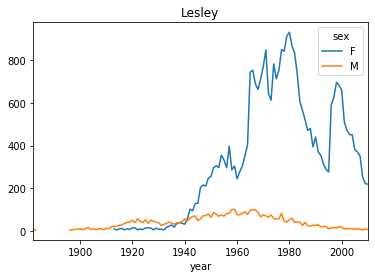

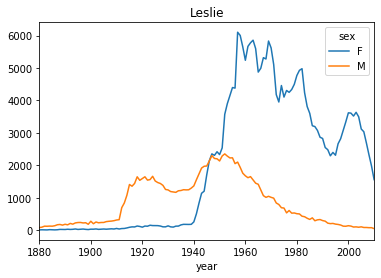

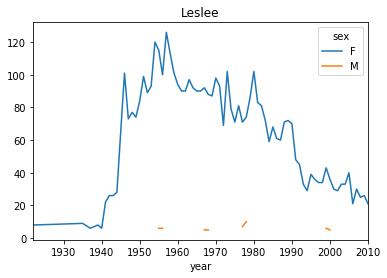

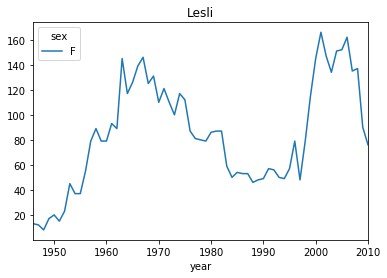

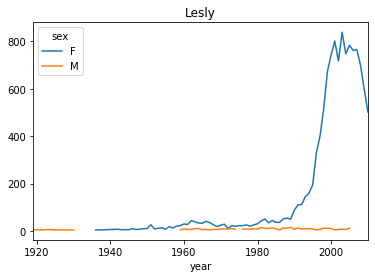

In [207]:
#연도에 따른 남녀가 같은 이름 추이 그래프

Lesley=names[names['name']=='Lesley']
Lesley=Lesley.pivot_table('briths', index='year', columns='sex', aggfunc=sum)
Lesley.plot(title='Lesley')

Leslie=names[names['name']=='Leslie']
Leslie=Leslie.pivot_table('briths', index='year', columns='sex', aggfunc=sum)
Leslie.plot(title='Leslie')

Leslee=names[names['name']=='Leslee']
Leslee=Leslee.pivot_table('briths', index='year', columns='sex', aggfunc=sum)
Leslee.plot(title='Leslee')

Lesli=names[names['name']=='Lesli']
Lesli=Lesli.pivot_table('briths', index='year', columns='sex', aggfunc=sum)
Lesli.plot(title='Lesli')

Lesly=names[names['name']=='Lesly']
Lesly=Lesly.pivot_table('briths', index='year', columns='sex', aggfunc=sum)
Lesly.plot(title='Lesly')


# name_list=['Lesley','Leslie','Leslee','Lesli','Lesly']
# for i in name_list:
#     name[names['name'] == i]
    
# names[names['name']=='Lesley']
# names[names['name']=='Leslie']
# names[names['name']=='Leslee']
# names[names['name']=='Lesli']
# names[names['name']=='Lesly']

In [ ]:
#함수화.
def get_graph(group):
    name_list=['Lesley','Leslie','Leslee','Lesli','Lesly']
    for i in name_list:
        name[names['name'] == i]

### 문제 3. data.go.kr(해도/안해도)
검색어 : 이름 -> 동대문구 동물이름 download
동물이름 첫번째 글자로 가장 많이 오는 글자는 무엇인가?

In [15]:
import pandas as pd
path="C:/Users/student/Downloads/서울특별시_동대문구_등록동물이름현황_20191203.csv"
df=pd.read_csv(path, encoding='cp949') # encoding Error: utf-8 -> cp949
df #4171 rows × 3 columns
First_letter=df['등록이름'].map(lambda x: x[0]) # First letter
First_letter.value_counts()
#type(First_letter) pandas.core.series.Series

김    90
이    84
아    69
하    53
마    43
     ..
뻰     1
헐     1
융     1
텅     1
쨩     1
Name: 등록이름, Length: 683, dtype: int64

In [29]:
# 가장 많이 나온 글자 상위 10개
First_letter.value_counts().sort_values(ascending=False)[:10]

김    90
이    84
아    69
하    53
마    43
오    42
뽀    41
복    40
다    39
호    38
Name: 등록이름, dtype: int64

### 알고리즘 문제
랜덤으로 1부터 45 까지의 무작위로 섞인  6개의 숫자와 1개의 보너스 숫자를 당첨번호를 생성해 저장한뒤

로또를 몇개 살지 입력받고 입력된 번호의 수에 따라 랜덤으로뽑힌 번호를 당첨번호와비교!

한뒤 당첨이되면 당첨된 번호와 축하의말을 출력 해주자

예시 : 로또를 몇개 구매하시겠습니까? : 5

 현재 당첨번호는 43,2,35,16,4,6 보너스번호는 11 입니다.

 구매하신 추첨번호는 43,2,41,18,19,21 보너스번호는 8입니다.

 구매하신 추첨번호는 28,20,1,4,32,5 보너스번호는 8입니다

 구매하신 추첨번호.... 6,4,35,2,43,16 보너스번호 9 ..1등이다!! 아싸 오늘저녁은 치킨이닭!!


            6가지의 숫자 모두 맞으면 1등

            5가지의 숫자 맞고 보너스번호 맞으면 2등

            5가지 숫자만 맞으면 3등


In [239]:
import random
official=[]
mine=[]
times=int(input("How many times do you play lottery?"))
lottery_list= range(1,56)

for i in range(times):
    new
mine=random.sample(range(1,46),6)
official=random.sample(range(1,46),6)
mine.sort()
official.sort()
print(mine)
print(official)


# while True:
#     if mine == official[]
#         print("Wow~ you won the lottery. Conglaturation! ")
#     elif mine

[2, 13, 23, 25, 31, 44]
[2, 3, 19, 21, 32, 38]


In [ ]:
n = int(input("로또를 몇개 구매하시겠습니까?: "))
num = range(1,46)
# 내 번호
my = []
for i in range(n):
    numbers = random.sample(num,6)
    my.append(numbers)
# 로또 번호    
lotto = random.sample(num,7)
​